In [1]:
import pandas as pd
import numpy as np
import time as t
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
dataframe_project = pd.read_csv(r'D:\College Education\Semester 5\19CSE305 Machine Learning\Project\Coding\patches_gabor_15816_1.csv')
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,good
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,good
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,good
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,good
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,bad
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,bad
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,bad
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,bad


In [3]:
dataframe_project.isna().sum()

ImageName                             0
LocalEnergy_0_1                       0
LocalEnergy_0_2                       0
LocalEnergy_0_3                       0
LocalEnergy_0.7853981633974483_1      0
LocalEnergy_0.7853981633974483_2      0
LocalEnergy_0.7853981633974483_3      0
LocalEnergy_1.5707963267948966_1      0
LocalEnergy_1.5707963267948966_2      0
LocalEnergy_1.5707963267948966_3      0
LocalEnergy_2.356194490192345_1       0
LocalEnergy_2.356194490192345_2       0
LocalEnergy_2.356194490192345_3       0
MeanAmplitude_0_1                     0
MeanAmplitude_0_2                     0
MeanAmplitude_0_3                     0
MeanAmplitude_0.7853981633974483_1    0
MeanAmplitude_0.7853981633974483_2    0
MeanAmplitude_0.7853981633974483_3    0
MeanAmplitude_1.5707963267948966_1    0
MeanAmplitude_1.5707963267948966_2    0
MeanAmplitude_1.5707963267948966_3    0
MeanAmplitude_2.356194490192345_1     0
MeanAmplitude_2.356194490192345_2     0
MeanAmplitude_2.356194490192345_3     0


In [4]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
dataframe_project['class'] = label_encoder.fit_transform(dataframe_project['class'])
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,1
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,1
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,1
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,1
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,0
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,0
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,0
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,0


In [5]:
input_project = dataframe_project.loc[:, dataframe_project.columns[1:25]]
output_project = dataframe_project.loc[:, dataframe_project.columns[25]]

input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(input_train, output_train.ravel())

In [8]:
# Project data classification rules
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

knn_model = KNeighborsClassifier()
k_range = list(range(2, 12))
param_grid = dict(n_neighbors=k_range)

scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10)
precision_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')
accuracy_list_knn = []
precision_list_knn = []
recall_list_knn = []
f1_list_knn = []
start_train_knn = t.time()
best_accuracy_knn = 0
best_params_knn = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    knn_loop = KNeighborsClassifier(**param_dict)
    knn_loop.fit(input_train_res, output_train_res)
    predicted_value = knn_loop.predict(input_train_res)
    score = accuracy_score(output_train_res, predicted_value)
    precision = precision_score(output_train_res, predicted_value, average='weighted')
    recall = precision_score(output_train_res, predicted_value, average='weighted')
    f1 = f1_score(output_train_res, predicted_value, average='weighted')
    accuracy_list_knn.append(score)
    precision_list_knn.append(precision)
    recall_list_knn.append(recall)
    f1_list_knn.append(f1)
    print(f"Parameters: {param_dict}, Accuracy: {score}")
    if score > best_accuracy_knn:
        best_accuracy_knn = score
        best_params_knn = param_dict
knn_best_model = KNeighborsClassifier(**best_params_knn)
knn_best_model.fit(input_train_res, output_train_res)
predicted_knn_train = knn_best_model.predict(input_train_res)
end_train_knn = t.time()
training_time_knn = end_train_knn - start_train_knn

start_test_knn = t.time()
predicted_knn_test = knn_best_model.predict(input_test)
end_test_knn = t.time()
testing_time_knn = end_test_knn - start_test_knn

mean_accuracy_knn = sum(accuracy_list_knn) / len(accuracy_list_knn)
mean_precision_knn = sum(precision_list_knn) / len(precision_list_knn)
mean_recall_knn = sum(recall_list_knn) / len(recall_list_knn)
mean_f1_knn = sum(f1_list_knn) / len(f1_list_knn)

Parameters: {'n_neighbors': 2}, Accuracy: 0.9276467868700878
Parameters: {'n_neighbors': 3}, Accuracy: 0.8897364771151179
Parameters: {'n_neighbors': 4}, Accuracy: 0.8705501618122977
Parameters: {'n_neighbors': 5}, Accuracy: 0.8465094775774388
Parameters: {'n_neighbors': 6}, Accuracy: 0.8328710124826629
Parameters: {'n_neighbors': 7}, Accuracy: 0.8162274618585298
Parameters: {'n_neighbors': 8}, Accuracy: 0.8053629218677762
Parameters: {'n_neighbors': 9}, Accuracy: 0.7938049006010172
Parameters: {'n_neighbors': 10}, Accuracy: 0.7880258899676376
Parameters: {'n_neighbors': 11}, Accuracy: 0.7801664355062413


In [11]:
print("Training data")
print(classification_report(output_train_res, predicted_knn_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_knn_train))
print("Precision: ", precision_score(output_train_res, predicted_knn_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_knn_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_knn_train, average='weighted'))
print(training_time_knn, 's')
print("Testing data")
print(classification_report(output_test, predicted_knn_test))
print("Accuracy: ", accuracy_score(output_test, predicted_knn_test))
print("Precision: ", precision_score(output_test, predicted_knn_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_knn_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_knn_test, average='weighted'))
print(testing_time_knn, 's')
print(best_params_knn)
print("Mean Accuracy: ", scores_knn.mean())
print("Standard Deviation: ",scores_knn.std())
print(precision_scores_knn)
print(recall_scores_knn)
print(f1_scores_knn)
print('Mean Precsion: ', mean_precision_knn)
print('Mean Recall: ', mean_recall_knn)
print('Mean F1-score: ', mean_f1_knn)

Training data
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1442
           1       0.95      0.86      0.90      1442
           2       1.00      0.92      0.96      1442

    accuracy                           0.93      4326
   macro avg       0.93      0.93      0.93      4326
weighted avg       0.93      0.93      0.93      4326

Accuracy:  0.9276467868700878
Precision:  0.9343009939304934
Recall:  0.9276467868700878
F1-score:  0.9278532939669256
5.972381830215454 s
Testing data
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       449
           1       0.78      0.70      0.74       621
           2       0.52      0.43      0.47       223

    accuracy                           0.69      1293
   macro avg       0.65      0.64      0.64      1293
weighted avg       0.69      0.69      0.68      1293

Accuracy:  0.6875483372003094
Precision:  0.6907697687784241
Recall:  0.

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from itertools import product

log_regre_model = LogisticRegressionCV()
param_grid={
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

scores_log_regre = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv=10)
precision_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')
accuracy_list_logreg = []
precision_list_logreg = []
recall_list_logreg = []
f1_list_logreg = []
start_train_log_regre = t.time()
best_accuracy_lr = 0
best_params_lr = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    lr_loop = LogisticRegressionCV(**param_dict)
    lr_loop.fit(input_train_res, output_train_res)
    predicted_value = lr_loop.predict(input_train_res)
    score = accuracy_score(output_train_res, predicted_value)
    accuracy_list_logreg.append(score)
    precision_list_logreg.append(precision)
    recall_list_logreg.append(recall)
    f1_list_logreg.append(f1)
    print(f"Parameters: {param_dict}, Accuracy: {score}")
    if score > best_accuracy_lr:
        best_accuracy_lr = score
        best_params_lr = param_dict
lr_best_model = LogisticRegressionCV(**best_params_lr)
lr_best_model.fit(input_train_res, output_train_res)
predicted_log_regre_train = lr_best_model.predict(input_train_res)
end_train_log_regre = t.time()
training_time_log_regre = end_train_log_regre - start_train_log_regre

start_test_log_regre = t.time()
predicted_log_regre_test = lr_best_model.predict(input_test)
end_test_log_regre = t.time()
testing_time_log_regre = end_test_log_regre - start_test_log_regre

mean_accuracy_logreg = sum(accuracy_list_logreg) / len(accuracy_list_logreg)
mean_precision_logreg = sum(precision_list_logreg) / len(precision_list_logreg)
mean_recall_logreg = sum(recall_list_logreg) / len(recall_list_logreg)
mean_f1_logreg = sum(f1_list_logreg) / len(f1_list_logreg)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Parameters: {'solver': 'lbfgs'}, Accuracy: 0.5464632454923717
Parameters: {'solver': 'liblinear'}, Accuracy: 0.6086453999075359


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:3

Parameters: {'solver': 'newton-cg'}, Accuracy: 0.6229773462783171


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.1256e-17): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda3

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.07001e-17): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.05218e-17): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.11856e-17): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.97705e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.8046e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda3

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.6071e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda3

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.28146e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.41159e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.52536e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.27648e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.30147e-18): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.09156e-17): result may not be accurate.
  warnings.warn(
C:\Users\LENOVO\anaconda

Parameters: {'solver': 'newton-cholesky'}, Accuracy: 0.5617198335644937


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Parameters: {'solver': 'sag'}, Accuracy: 0.5490060101710588


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Parameters: {'solver': 'saga'}, Accuracy: 0.5483125288950532


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:3

In [13]:
print("Training data")
print(classification_report(output_train_res, predicted_log_regre_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_log_regre_train))
print("Precision: ", precision_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_log_regre_train, average='weighted'))
print(training_time_log_regre, 's')
print("Testing data")
print(classification_report(output_test, predicted_log_regre_test))
print("Accuracy: ", accuracy_score(output_test, predicted_log_regre_test))
print("Precision: ", precision_score(output_test, predicted_log_regre_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_log_regre_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_log_regre_test, average='weighted'))
print(testing_time_log_regre, 's')
print(best_params_lr)
print("Mean Accuracy: ",mean_accuracy_logreg)
print("Standard Deviation: ",scores_log_regre.std())
print(precision_scores_logreg)
print(recall_scores_logreg)
print(f1_scores_logreg)
print('Mean Precsion: ', mean_precision_logreg)
print('Mean Recall: ', mean_recall_logreg)
print('Mean F1-score: ', mean_f1_logreg)

Training data
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1442
           1       0.54      0.75      0.62      1442
           2       0.69      0.54      0.61      1442

    accuracy                           0.62      4326
   macro avg       0.64      0.62      0.62      4326
weighted avg       0.64      0.62      0.62      4326

Accuracy:  0.6229773462783171
Precision:  0.6436745493115776
Recall:  0.6229773462783171
F1-score:  0.6226965834111
160.49246740341187 s
Testing data
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       449
           1       0.69      0.74      0.72       621
           2       0.46      0.51      0.48       223

    accuracy                           0.65      1293
   macro avg       0.62      0.62      0.62      1293
weighted avg       0.66      0.65      0.65      1293

Accuracy:  0.654292343387471
Precision:  0.6596919889978269
Recall:  0.654

In [16]:
# Multi Layer Perceptron
# Project data classification rules
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
param_grid={
'learning_rate': ["constant"],
'hidden_layer_sizes': [(100,3)],
'alpha': [0.8],
'solver': ['lbfgs', 'adam'],
'activation': ['identity', 'logistic', 'tanh', 'relu']
}
scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv=10)
precision_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')

accuracy_list_mlp = []
precision_list_mlp = []
recall_list_mlp = []
f1_list_mlp = []

start_train_mlp = t.time()
best_accuracy_mlp = 0
best_params_mlp = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    mlp_loop = MLPClassifier(**param_dict)
    mlp_loop.fit(input_train_res, output_train_res)
    predicted_value_mlp = mlp_loop.predict(input_train_res)

    accuracy_mlp = accuracy_score(output_train_res, predicted_value_mlp)
    precision_mlp = precision_score(output_train_res, predicted_value_mlp, average='weighted')
    recall_mlp = recall_score(output_train_res, predicted_value_mlp, average='weighted')
    f1_mlp = f1_score(output_train_res, predicted_value_mlp, average='weighted')
    
    accuracy_list_mlp.append(accuracy_mlp)
    precision_list_mlp.append(precision_mlp)
    recall_list_mlp.append(recall_mlp)
    f1_list_mlp.append(f1_mlp)
    
    print(f"Parameters: {param_dict}, Accuracy: {accuracy_mlp}")

    if accuracy_mlp > best_accuracy_mlp:
        best_accuracy_mlp = accuracy_mlp
        best_params_mlp = param_dict

mlp_best_model = MLPClassifier(**best_params_mlp)
mlp_best_model.fit(input_train_res, output_train_res)
predicted_mlp_train = mlp_best_model.predict(input_train_res)
end_train_mlp = t.time()
training_time_mlp = end_train_mlp - start_train_mlp

start_test_mlp = t.time()
predicted_mlp_test = mlp_best_model.predict(input_test)
end_test_mlp = t.time()
testing_time_mlp = end_test_mlp - start_test_mlp

mean_accuracy_mlp = sum(accuracy_list_mlp) / len(accuracy_list_mlp)
mean_precision_mlp = sum(precision_list_mlp) / len(precision_list_mlp)
mean_recall_mlp = sum(recall_list_mlp) / len(recall_list_mlp)
mean_f1_mlp = sum(f1_list_mlp) / len(f1_list_mlp)
mean_training_time_mlp = training_time_mlp / len(scores_mlp)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'identity'}, Accuracy: 0.3333333333333333
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'logistic'}, Accuracy: 0.5647249190938511
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'tanh'}, Accuracy: 0.4764216366158114


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'relu'}, Accuracy: 0.3333333333333333
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'identity'}, Accuracy: 0.3314840499306519


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'logistic'}, Accuracy: 0.33356449375866853


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'tanh'}, Accuracy: 0.3777161349976884


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'relu'}, Accuracy: 0.3333333333333333


In [17]:
print("Training data")
print(classification_report(output_train_res, predicted_mlp_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_mlp_train))
print("Precision: ", precision_score(output_train_res, predicted_mlp_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_mlp_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_mlp_train, average='weighted'))
print(training_time_mlp, 's')
print("Testing data")
print(classification_report(output_test, predicted_mlp_test))
print("Accuracy: ", accuracy_score(output_test, predicted_mlp_test))
print("Precision: ", precision_score(output_test, predicted_mlp_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_mlp_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_mlp_test, average='weighted'))
print(testing_time_mlp, 's')
print(best_params_mlp)
print("Mean Accuracy: ", scores_mlp.mean())
print("Standard Deviation: ",scores_mlp.std())
print(precision_scores_mlp)
print(recall_scores_mlp)
print(f1_scores_mlp)
print('Mean Precsion: ', mean_precision_mlp)
print('Mean Recall: ', mean_recall_mlp)
print('Mean F1-score: ', mean_f1_mlp)

Training data
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1442
           1       0.51      0.76      0.61      1442
           2       0.82      0.34      0.48      1442

    accuracy                           0.58      4326
   macro avg       0.64      0.58      0.57      4326
weighted avg       0.64      0.58      0.57      4326

Accuracy:  0.580906148867314
Precision:  0.6401510609312561
Recall:  0.580906148867314
F1-score:  0.5688612981503448
42.073365688323975 s
Testing data
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       449
           1       0.67      0.79      0.72       621
           2       0.72      0.33      0.45       223

    accuracy                           0.66      1293
   macro avg       0.67      0.59      0.60      1293
weighted avg       0.66      0.66      0.65      1293

Accuracy:  0.6581593194122196
Precision:  0.6630103647213152
Recall:  0.6

In [54]:
from sklearn import preprocessing as prepro
normal_scaler = prepro.StandardScaler()
scaled_columns = dataframe_project.columns[1:25]
scaled_df = dataframe_project
for col in scaled_columns:
    scaled_df[col] = normal_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
scaled_df

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,0.666561,-0.787215,0.215413,1.248537,0.990115,...,1.077631,1.082246,0.726466,0.556098,1.807526,1.081326,1.075729,1.077680,0.730857,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,0.497735,-0.743263,0.810270,1.219416,0.800269,...,1.286252,1.289359,0.676086,0.527098,1.847232,1.289622,1.285047,1.286934,0.680215,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,0.458921,-0.862340,-0.065256,1.081344,1.084022,...,1.254597,1.256790,0.773855,0.580019,1.896600,1.258796,1.253507,1.254317,0.777327,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,0.532372,-0.657909,0.232855,2.600439,0.980256,...,1.025223,1.032650,0.672973,0.570229,4.112539,1.039405,1.022403,1.026616,0.679669,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,0.685009,-0.873417,-0.272901,0.318206,1.069484,...,1.118821,1.120545,0.797933,0.597516,0.650323,1.120221,1.117981,1.118603,0.799854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,0.674025,-0.269214,-0.155585,0.040035,0.484496,...,0.630777,0.629839,0.708355,0.581279,-0.093301,0.630111,0.630928,0.630116,0.707160,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,0.715647,-0.494143,-0.535561,0.619319,0.931666,...,0.912462,0.913728,0.725457,0.611745,0.463753,0.913006,0.912409,0.912989,0.729585,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,0.620126,-0.538403,1.330936,0.260876,0.947406,...,0.813567,0.814113,0.591175,0.452550,0.002397,0.811487,0.813599,0.813718,0.593426,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,0.639883,-0.033262,-0.050772,1.227483,0.550753,...,0.564815,0.566770,0.637962,0.600673,1.057681,0.567096,0.565145,0.567660,0.637707,0


In [55]:
dataframe_scaled_input = scaled_df.iloc[:, 1:25]
dataframe_scaled_output = scaled_df.iloc[:, 25]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
scaled_input_train_res, scaled_output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())

In [57]:
# Project data classification rules
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

knn_model = KNeighborsClassifier()
k_range = list(range(2, 12))
param_grid = dict(n_neighbors=k_range)

scores_knn = cross_val_score(knn_model, dataframe_scaled_input.values, dataframe_scaled_output.values, cv = 10)
accuracy_list_knn = []
precision_list_knn = []
recall_list_knn = []
f1_list_knn = []
start_train_knn = t.time()
best_accuracy_knn = 0
best_params_knn = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    knn_loop = KNeighborsClassifier(**param_dict)
    knn_loop.fit(scaled_input_train_res, scaled_output_train_res)
    predicted_value = knn_loop.predict(scaled_input_train_res)
    score = accuracy_score(scaled_output_train_res, predicted_value)
    precision = precision_score(scaled_output_train_res, predicted_value, average='weighted')
    recall = precision_score(scaled_output_train_res, predicted_value, average='weighted')
    f1 = f1_score(scaled_output_train_res, predicted_value, average='weighted')
    
    accuracy_list_knn.append(score)
    precision_list_knn.append(precision)
    recall_list_knn.append(recall)
    f1_list_knn.append(f1)
    
    print(f"Parameters: {param_dict}, Accuracy: {score}")
    if score > best_accuracy_knn:
        best_accuracy_knn = score
        best_params_knn = param_dict

knn_best_model = KNeighborsClassifier(**best_params_knn)
knn_best_model.fit(scaled_input_train_res, scaled_output_train_res)
predicted_knn_train = knn_best_model.predict(scaled_input_train_res)
end_train_knn = t.time()
training_time_knn = end_train_knn - start_train_knn

start_test_knn = t.time()
predicted_knn_test = knn_best_model.predict(scaled_input_test)
end_test_knn = t.time()
testing_time_knn = end_test_knn - start_test_knn

mean_accuracy_knn = sum(accuracy_list_knn) / len(accuracy_list_knn)
mean_precision_knn = sum(precision_list_knn) / len(precision_list_knn)
mean_recall_knn = sum(recall_list_knn) / len(recall_list_knn)
mean_f1_knn = sum(f1_list_knn) / len(f1_list_knn)

Parameters: {'n_neighbors': 2}, Accuracy: 0.9394359685621821
Parameters: {'n_neighbors': 3}, Accuracy: 0.9116967175219602
Parameters: {'n_neighbors': 4}, Accuracy: 0.888580674988442
Parameters: {'n_neighbors': 5}, Accuracy: 0.8684697179842811
Parameters: {'n_neighbors': 6}, Accuracy: 0.8541377716134998
Parameters: {'n_neighbors': 7}, Accuracy: 0.8416551086453999
Parameters: {'n_neighbors': 8}, Accuracy: 0.8310217290799815
Parameters: {'n_neighbors': 9}, Accuracy: 0.8203883495145631
Parameters: {'n_neighbors': 10}, Accuracy: 0.8185390661118817
Parameters: {'n_neighbors': 11}, Accuracy: 0.8125288950531669


In [58]:
print("Training data")
print(classification_report(scaled_output_train_res, predicted_knn_train))
print("Accuracy: ", accuracy_score(scaled_output_train_res, predicted_knn_train))
print("Precision: ", precision_score(scaled_output_train_res, predicted_knn_train, average='weighted'))
print("Recall: ", recall_score(scaled_output_train_res, predicted_knn_train, average='weighted'))
print("F1-score: ", f1_score(scaled_output_train_res, predicted_knn_train, average='weighted'))
print(training_time_knn, 's')
print("Testing data")
print(classification_report(scaled_output_test, predicted_knn_test))
print("Accuracy: ", accuracy_score(scaled_output_test, predicted_knn_test))
print("Precision: ", precision_score(scaled_output_test, predicted_knn_test, average='weighted'))
print("Recall: ", recall_score(scaled_output_test, predicted_knn_test, average='weighted'))
print("F1-score: ", f1_score(scaled_output_test, predicted_knn_test, average='weighted'))
print(testing_time_knn, 's')
print(best_params_knn)
print("Mean Accuracy: ", mean_accuracy_knn)
print("Standard Deviation: ",scores_knn.std())
print('Mean Precsion: ', mean_precision_knn)
print('Mean Recall: ', mean_recall_knn)
print('Mean F1-score: ', mean_f1_knn)

Training data
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1442
           1       0.96      0.89      0.92      1442
           2       1.00      0.93      0.96      1442

    accuracy                           0.94      4326
   macro avg       0.94      0.94      0.94      4326
weighted avg       0.94      0.94      0.94      4326

Accuracy:  0.9394359685621821
Precision:  0.9440953014813117
Recall:  0.9394359685621821
F1-score:  0.9395972262986597
2.4072186946868896 s
Testing data
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       449
           1       0.80      0.70      0.74       621
           2       0.53      0.46      0.50       223

    accuracy                           0.69      1293
   macro avg       0.66      0.66      0.65      1293
weighted avg       0.70      0.69      0.69      1293

Accuracy:  0.6945088940448569
Precision:  0.7007490720894505
Recall:  0

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
log_regre_model = LogisticRegressionCV()
param_grid_logreg = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

scores_logreg = cross_val_score(log_regre_model, dataframe_scaled_input.values, dataframe_scaled_output.values, cv=10)
accuracy_list_logreg = []
precision_list_logreg = []
recall_list_logreg = []
f1_list_logreg = []

start_train_logreg = t.time()
best_accuracy_logreg = 0
best_params_logreg = {}
for params in product(*param_grid_logreg.values()):
    param_dict = dict(zip(param_grid_logreg.keys(), params))
    lr_loop = LogisticRegressionCV(**param_dict)
    lr_loop.fit(scaled_input_train_res, scaled_output_train_res)
    predicted_value = lr_loop.predict(scaled_input_train_res)
    
    score = accuracy_score(scaled_output_train_res, predicted_value)
    precision = precision_score(scaled_output_train_res, predicted_value, average='weighted')
    recall = recall_score(scaled_output_train_res, predicted_value, average='weighted')
    f1 = f1_score(scaled_output_train_res, predicted_value, average='weighted')
    
    accuracy_list_logreg.append(score)
    precision_list_logreg.append(precision)
    recall_list_logreg.append(recall)
    f1_list_logreg.append(f1)
    
    print(f"Parameters: {param_dict}, Accuracy: {score}")

    if score > best_accuracy_logreg:
        best_accuracy_logreg = score
        best_params_logreg = param_dict

lr_best_model = LogisticRegressionCV(**best_params_logreg)
lr_best_model.fit(scaled_input_train_res, scaled_output_train_res)
predicted_logreg_train = lr_best_model.predict(scaled_input_train_res)
end_train_logreg = t.time()
training_time_logreg = end_train_logreg - start_train_logreg

start_test_logreg = t.time()
predicted_logreg_test = lr_best_model.predict(scaled_input_test)
end_test_logreg = t.time()
testing_time_logreg = end_test_logreg - start_test_logreg

mean_accuracy_logreg = sum(accuracy_list_logreg) / len(accuracy_list_logreg)
mean_precision_logreg = sum(precision_list_logreg) / len(precision_list_logreg)
mean_recall_logreg = sum(recall_list_logreg) / len(recall_list_logreg)
mean_f1_logreg = sum(f1_list_logreg) / len(f1_list_logreg)
mean_training_time_logreg = training_time_logreg / len(accuracy_list_logreg)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Parameters: {'solver': 'lbfgs'}, Accuracy: 0.6537216828478964
Parameters: {'solver': 'liblinear'}, Accuracy: 0.6708275543226999
Parameters: {'solver': 'newton-cg'}, Accuracy: 0.6773000462320851
Parameters: {'solver': 'newton-cholesky'}, Accuracy: 0.6731391585760518


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Parameters: {'solver': 'sag'}, Accuracy: 0.6546463245492372


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Parameters: {'solver': 'saga'}, Accuracy: 0.6319926028663893


In [60]:
print("Training data")
print(classification_report(scaled_output_train_res, predicted_log_regre_train))
print("Accuracy: ", accuracy_score(scaled_output_train_res, predicted_log_regre_train))
print("Precision: ", precision_score(scaled_output_train_res, predicted_log_regre_train, average='weighted'))
print("Recall: ", recall_score(scaled_output_train_res, predicted_log_regre_train, average='weighted'))
print("F1-score: ", f1_score(scaled_output_train_res, predicted_log_regre_train, average='weighted'))
print(training_time_log_regre, 's')
print("Testing data")
print(classification_report(scaled_output_test, predicted_log_regre_test))
print("Accuracy: ", accuracy_score(scaled_output_test, predicted_log_regre_test))
print("Precision: ", precision_score(scaled_output_test, predicted_log_regre_test, average='weighted'))
print("Recall: ", recall_score(scaled_output_test, predicted_log_regre_test, average='weighted'))
print("F1-score: ", f1_score(scaled_output_test, predicted_log_regre_test, average='weighted'))
print(testing_time_log_regre, 's')
print(best_params_logreg)
print("Mean Accuracy: ", mean_accuracy_logreg)
print("Standard Deviation: ",scores_log_regre.std())
print('Mean Precsion: ', mean_precision_logreg)
print('Mean Recall: ', mean_recall_logreg)
print('Mean F1-score: ', mean_f1_logreg)

Training data
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1442
           1       0.54      0.75      0.62      1442
           2       0.69      0.54      0.61      1442

    accuracy                           0.62      4326
   macro avg       0.64      0.62      0.62      4326
weighted avg       0.64      0.62      0.62      4326

Accuracy:  0.6229773462783171
Precision:  0.6436745493115776
Recall:  0.6229773462783171
F1-score:  0.6226965834111
162.31716585159302 s
Testing data
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       449
           1       0.69      0.74      0.72       621
           2       0.46      0.51      0.48       223

    accuracy                           0.65      1293
   macro avg       0.62      0.62      0.62      1293
weighted avg       0.66      0.65      0.65      1293

Accuracy:  0.654292343387471
Precision:  0.6596919889978269
Recall:  0.654

In [61]:
# Multi Layer Perceptron
# Project data classification rules
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
param_grid={
'learning_rate': ["constant"],
'hidden_layer_sizes': [(100,3)],
'alpha': [0.8],
'solver': ['lbfgs', 'sgd', 'adam'],
'activation': ['identity', 'logistic', 'tanh', 'relu']
}
scores_mlp = cross_val_score(mlp_model, dataframe_scaled_input.values, dataframe_scaled_output.values, cv=10)
accuracy_list_mlp = []
precision_list_mlp = []
recall_list_mlp = []
f1_list_mlp = []

start_train_mlp = t.time()
best_accuracy_mlp = 0
best_params_mlp = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    mlp_loop = MLPClassifier(**param_dict)
    mlp_loop.fit(scaled_input_train_res, scaled_output_train_res)
    predicted_value = mlp_loop.predict(scaled_input_train_res)

    score = accuracy_score(scaled_output_train_res, predicted_value)
    precision = precision_score(scaled_output_train_res, predicted_value, average='weighted')
    recall = recall_score(scaled_output_train_res, predicted_value, average='weighted')
    f1 = f1_score(scaled_output_train_res, predicted_value, average='weighted')
    
    accuracy_list_mlp.append(score)
    precision_list_mlp.append(precision)
    recall_list_mlp.append(recall)
    f1_list_mlp.append(f1)
    
    print(f"Parameters: {param_dict}, Accuracy: {score}")

    if score > best_accuracy_mlp:
        best_accuracy_mlp = score
        best_params_mlp = param_dict

mlp_best_model = MLPClassifier(**best_params_mlp)
mlp_best_model.fit(scaled_input_train_res, scaled_output_train_res)
predicted_mlp_train = mlp_best_model.predict(scaled_input_train_res)
end_train_mlp = t.time()
training_time_mlp = end_train_mlp - start_train_mlp

start_test_mlp = t.time()
predicted_mlp_test = mlp_best_model.predict(scaled_input_test)
end_test_mlp = t.time()
testing_time_mlp = end_test_mlp - start_test_mlp

mean_accuracy_mlp = sum(accuracy_list_mlp) / len(accuracy_list_mlp)
mean_precision_mlp = sum(precision_list_mlp) / len(precision_list_mlp)
mean_recall_mlp = sum(recall_list_mlp) / len(recall_list_mlp)
mean_f1_mlp = sum(f1_list_mlp) / len(f1_list_mlp)
mean_training_time_mlp = training_time_mlp / len(scores_mlp)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_

Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'identity'}, Accuracy: 0.6548774849745723


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'logistic'}, Accuracy: 0.7142857142857143


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'tanh'}, Accuracy: 0.7616736014794268


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'lbfgs', 'activation': 'relu'}, Accuracy: 0.7829403606102635


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'sgd', 'activation': 'identity'}, Accuracy: 0.5785945446139621


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'sgd', 'activation': 'logistic'}, Accuracy: 0.478502080443828


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'sgd', 'activation': 'tanh'}, Accuracy: 0.6153490522422561


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'sgd', 'activation': 'relu'}, Accuracy: 0.6000924641701341
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'identity'}, Accuracy: 0.5836800739713361


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'logistic'}, Accuracy: 0.5228848821081831
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'tanh'}, Accuracy: 0.6994914470642626
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 3), 'alpha': 0.8, 'solver': 'adam', 'activation': 'relu'}, Accuracy: 0.7383263985205732


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
print("Training data")
print(classification_report(scaled_output_train_res, predicted_mlp_train))
print("Accuracy: ", accuracy_score(scaled_output_train_res, predicted_mlp_train))
print("Precision: ", precision_score(scaled_output_train_res, predicted_mlp_train, average='weighted'))
print("Recall: ", recall_score(scaled_output_train_res, predicted_mlp_train, average='weighted'))
print("F1-score: ", f1_score(scaled_output_train_res, predicted_mlp_train, average='weighted'))
print(training_time_mlp, 's')
print("Testing data")
print(classification_report(scaled_output_test, predicted_mlp_test))
print("Accuracy: ", accuracy_score(scaled_output_test, predicted_mlp_test))
print("Precision: ", precision_score(scaled_output_test, predicted_mlp_test, average='weighted'))
print("Recall: ", recall_score(scaled_output_test, predicted_mlp_test, average='weighted'))
print("F1-score: ", f1_score(scaled_output_test, predicted_mlp_test, average='weighted'))
print(testing_time_mlp, 's')
print(best_params_mlp)
print("Mean Accuracy: ", mean_accuracy_mlp)
print("Standard Deviation: ",scores_mlp.std())
print('Mean Precsion: ', mean_precision_mlp)
print('Mean Recall: ', mean_recall_mlp)
print('Mean F1-score: ', mean_f1_mlp)

Training data
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1442
           1       0.76      0.83      0.79      1442
           2       0.80      0.76      0.78      1442

    accuracy                           0.79      4326
   macro avg       0.79      0.79      0.79      4326
weighted avg       0.79      0.79      0.79      4326

Accuracy:  0.7891816920943134
Precision:  0.7904004903967217
Recall:  0.7891816920943134
F1-score:  0.7891002272642407
40.415955781936646 s
Testing data
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       449
           1       0.82      0.78      0.80       621
           2       0.53      0.59      0.56       223

    accuracy                           0.75      1293
   macro avg       0.71      0.72      0.71      1293
weighted avg       0.76      0.75      0.75      1293

Accuracy:  0.7509667440061871
Precision:  0.7567933302127874
Recall:  0

In [63]:
from matplotlib import pyplot as plt
accuracy_bn_training_lists = [1, 0.7384, 1, 0.6185, np.nan, 0.6363, 0.6026]
accuracy_an_training_lists = [1, 0.7308, 1, 0.7519, 0.7524, 0.6363, 0.6724]
accuracy_bn_testing_lists = [0.6906 , 0.7470, 0.7602, 0.6566, np.nan, 0.6604, 0.6357]
accuracy_an_testing_lists = [0.7030, 0.7308, 0.7664, 0.7556, 0.7811, 0.6604, 0.7300]

precision_bn_training_lists = [1, 0.7513, 1, 0.6588, np.nan, 0.5479, 0.6287]
precision_an_training_lists = [1, 0.7479, 1, 0.7597, 0.7651, 0.5479, 0.6834]
precision_bn_testing_lists = [0.7025, 0.7613, 0.7554, 0.6502, np.nan, 0.5609, 0.6426]
precision_an_testing_lists = [0.7124, 0.7446, 0.7618, 0.7599, 0.7777, 0.5609, 0.7251]

recall_bn_training_lists = [1, 0.7384, 1, 0.6185, np.nan, 0.6363, 0.6026]
recall_an_training_lists = [1, 0.7308, 1, 0.7519, 0.7524, 0.6363, 0.6724]
recall_bn_testing_lists = [0.6906, 0.7470, 0.7602, 0.6566, np.nan, 0.6604, 0.6357]
recall_an_testing_lists = [0.7030, 0.7308, 0.7664, 0.7556, 0.7811, 0.6604, 0.7300]

f1score_bn_training_lists = [1, 0.7237, 1, 0.6044, np.nan, 0.5621, 0.6010]
f1score_an_training_lists = [1, 0.7155, 1, 0.7509, 0.7501, 0.5621, 0.6671]
f1score_bn_testing_lists = [0.6956, 0.7289, 0.7561, 0.6466, np.nan, 0.5885, 0.6333]
f1score_an_testing_lists = [0.7069, 0.7108, 0.7269, 0.7570, 0.7789, 0.5885, 0.7271]

time_bn_training_lists = [0.5164, 0.4450, 69.2890, 168.3777, np.nan, 0.1021, 66.0985]
time_an_training_lists = [0.2800, 0.5909, 75.3815, 214.1080, 75.3815, 0.1259, 66.0985]
time_bn_testing_lists = [0.1401, 0.0001, 0.0258, 0.0043, np.nan, 0.0001, 0.0019]
time_an_testing_lists = [0.0748, 0.0040, 0.0265, 0.0040, 0.4687, 0.0035, 0.0010]

classifier_lists = ['k-NN Classifier', 'Desicion Tree', 'Random Forest', 'MLP Classifer', 'SVM Classifier', 'Naive Bayes', 'Logisitic Regression']

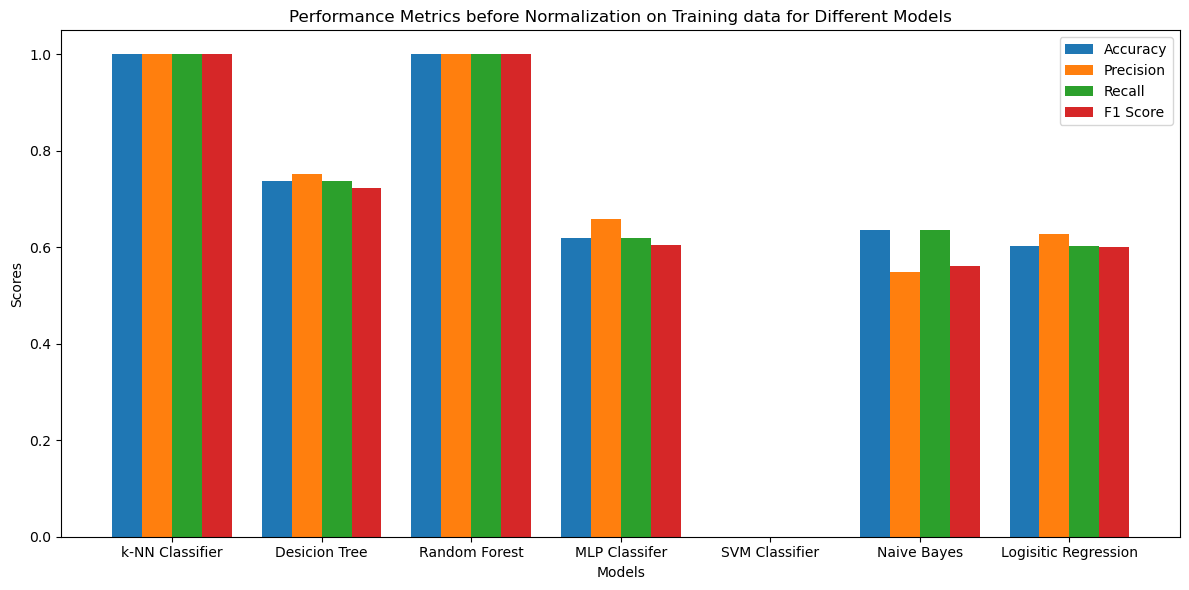

In [64]:
# Setting the positions for the bars
bar_width = 0.2
index = list(range(len(classifier_lists)))
index_precision = [i + bar_width for i in index]
index_recall = [i + 2 * bar_width for i in index]
index_f1 = [i + 3 * bar_width for i in index]

# Creating bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_bn_training_lists, width=bar_width, label='Accuracy')
plt.bar(index_precision, precision_bn_training_lists, width=bar_width, label='Precision')
plt.bar(index_recall, recall_bn_training_lists, width=bar_width, label='Recall')
plt.bar(index_f1, f1score_bn_training_lists, width=bar_width, label='F1 Score')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics before Normalization on Training data for Different Models')
plt.xticks([i + 1.5 * bar_width for i in index], classifier_lists)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

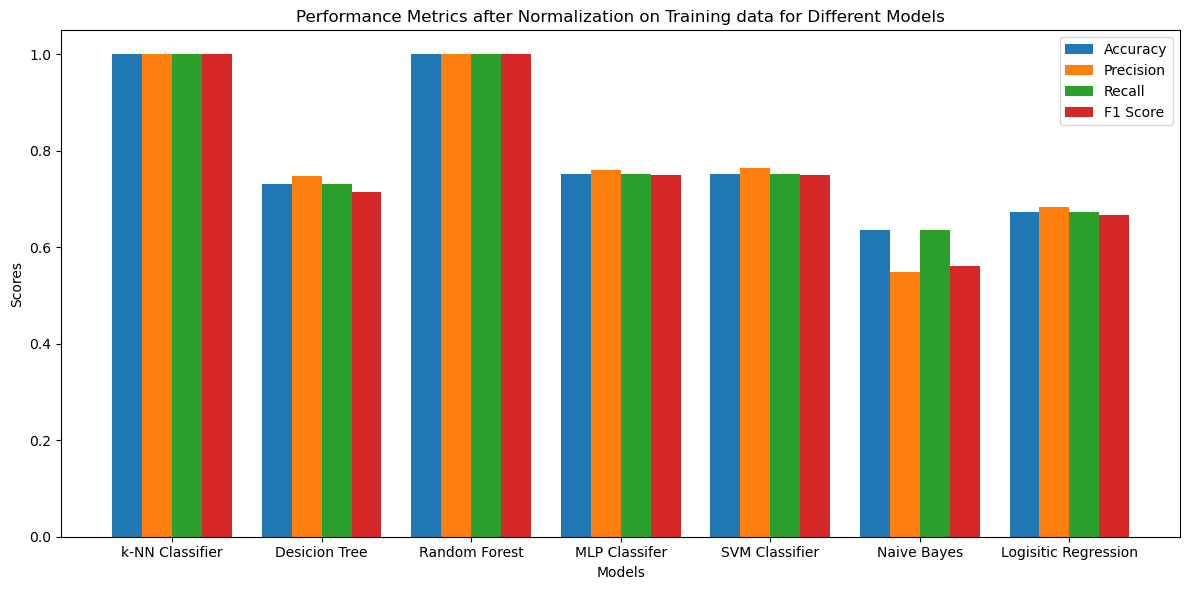

In [65]:
# Setting the positions for the bars
bar_width = 0.2
index = list(range(len(classifier_lists)))
index_precision = [i + bar_width for i in index]
index_recall = [i + 2 * bar_width for i in index]
index_f1 = [i + 3 * bar_width for i in index]

# Creating bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_an_training_lists, width=bar_width, label='Accuracy')
plt.bar(index_precision, precision_an_training_lists, width=bar_width, label='Precision')
plt.bar(index_recall, recall_an_training_lists, width=bar_width, label='Recall')
plt.bar(index_f1, f1score_an_training_lists, width=bar_width, label='F1 Score')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics after Normalization on Training data for Different Models')
plt.xticks([i + 1.5 * bar_width for i in index], classifier_lists)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

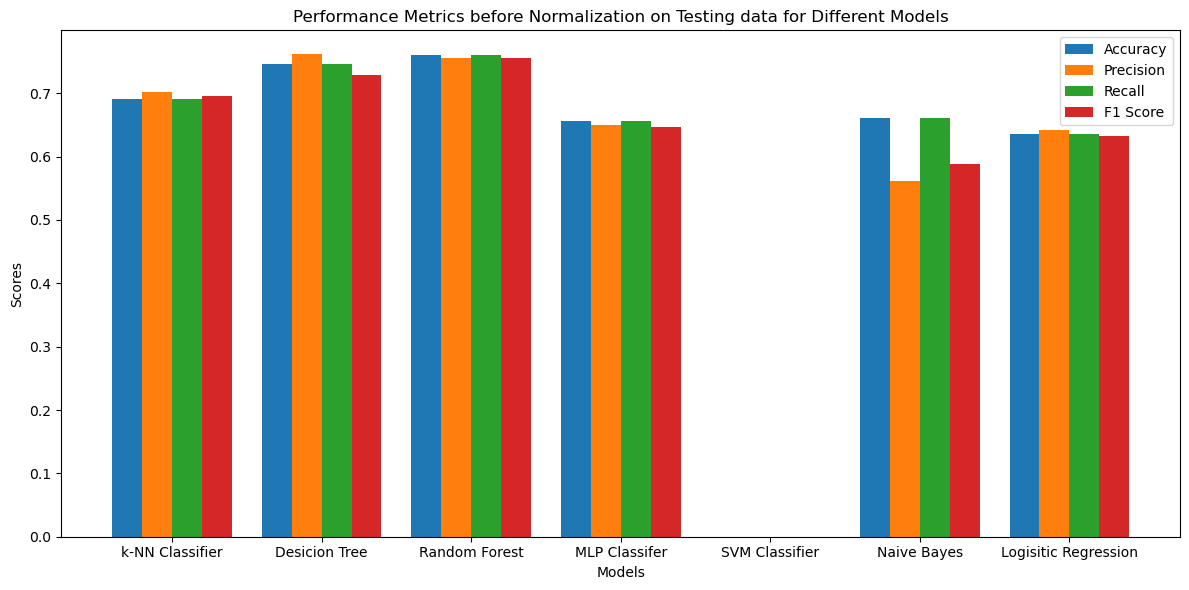

In [66]:
# Setting the positions for the bars
bar_width = 0.2
index = list(range(len(classifier_lists)))
index_precision = [i + bar_width for i in index]
index_recall = [i + 2 * bar_width for i in index]
index_f1 = [i + 3 * bar_width for i in index]

# Creating bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_bn_testing_lists, width=bar_width, label='Accuracy')
plt.bar(index_precision, precision_bn_testing_lists, width=bar_width, label='Precision')
plt.bar(index_recall, recall_bn_testing_lists, width=bar_width, label='Recall')
plt.bar(index_f1, f1score_bn_testing_lists, width=bar_width, label='F1 Score')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics before Normalization on Testing data for Different Models')
plt.xticks([i + 1.5 * bar_width for i in index], classifier_lists)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

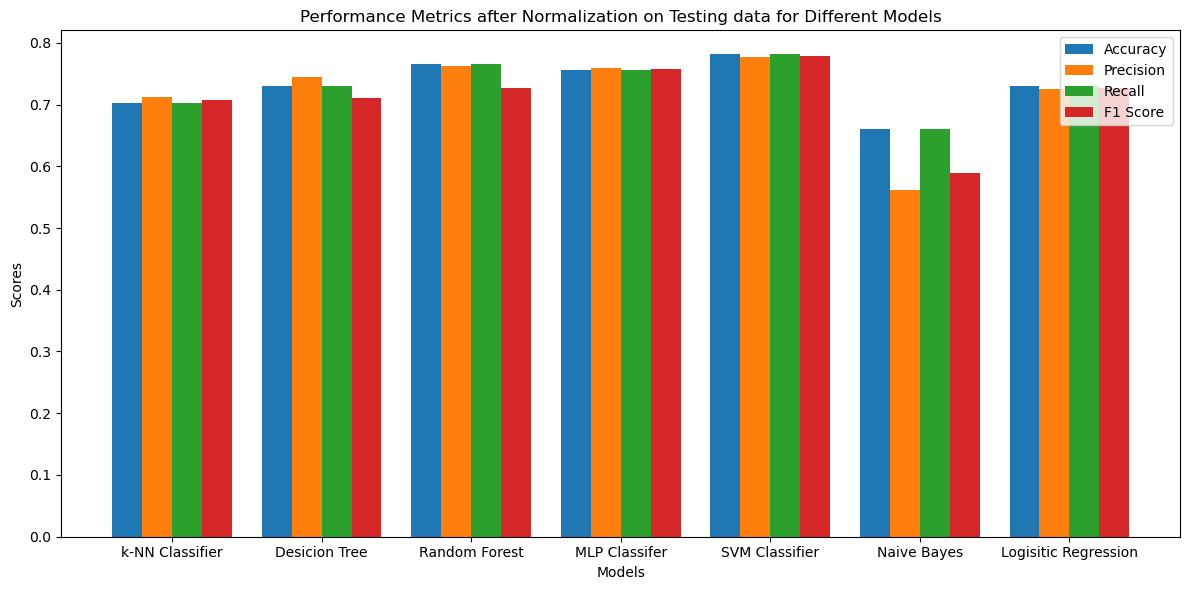

In [67]:
# Setting the positions for the bars
bar_width = 0.2
index = list(range(len(classifier_lists)))
index_precision = [i + bar_width for i in index]
index_recall = [i + 2 * bar_width for i in index]
index_f1 = [i + 3 * bar_width for i in index]

# Creating bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_an_testing_lists, width=bar_width, label='Accuracy')
plt.bar(index_precision, precision_an_testing_lists, width=bar_width, label='Precision')
plt.bar(index_recall, recall_an_testing_lists, width=bar_width, label='Recall')
plt.bar(index_f1, f1score_an_testing_lists, width=bar_width, label='F1 Score')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics after Normalization on Testing data for Different Models')
plt.xticks([i + 1.5 * bar_width for i in index], classifier_lists)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\537539115.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


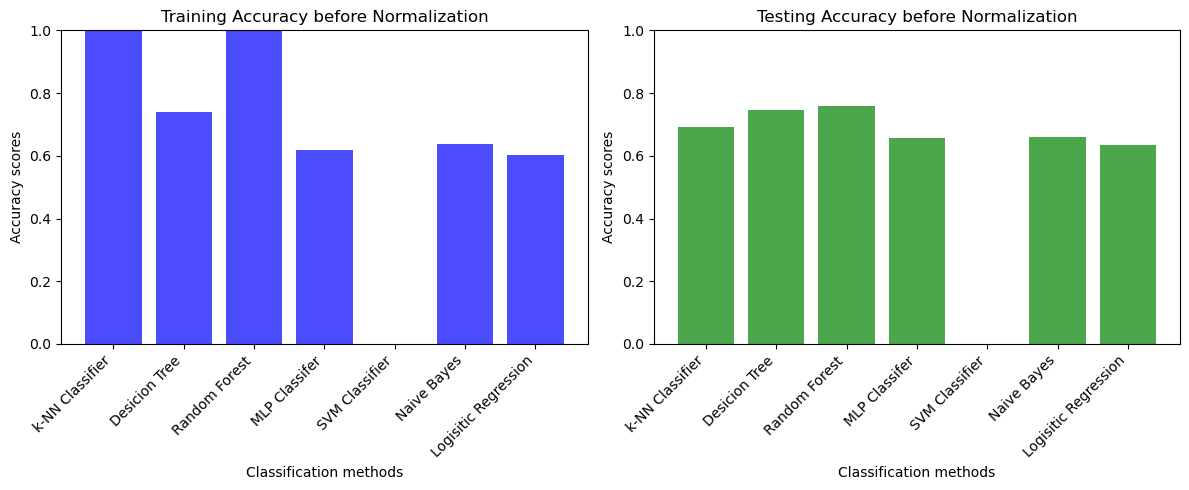

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, accuracy_bn_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Accuracy before Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Accuracy scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, accuracy_bn_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Accuracy before Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Accuracy scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\3745936694.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


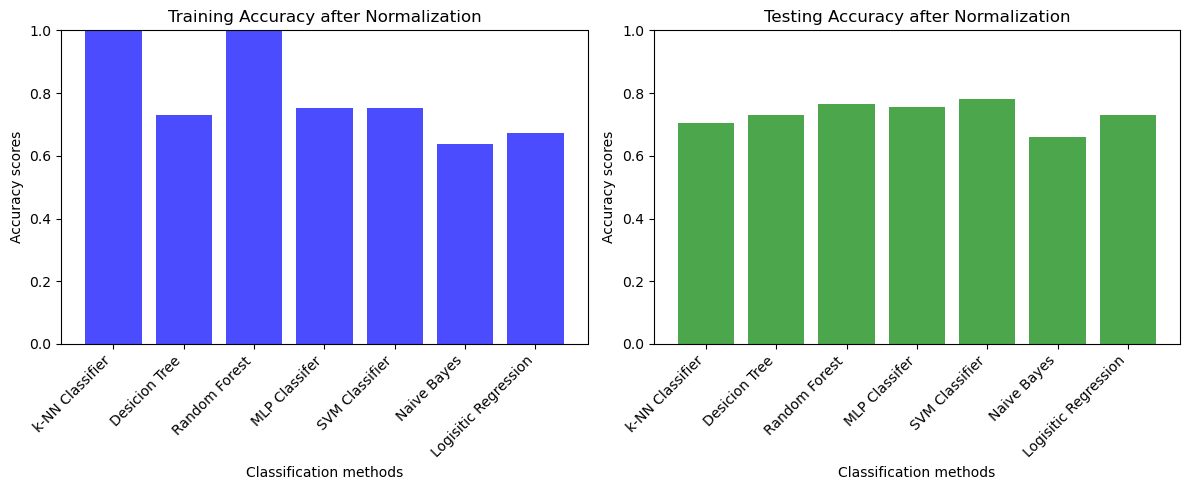

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, accuracy_an_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Accuracy after Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Accuracy scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, accuracy_an_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Accuracy after Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Accuracy scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\3965627327.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


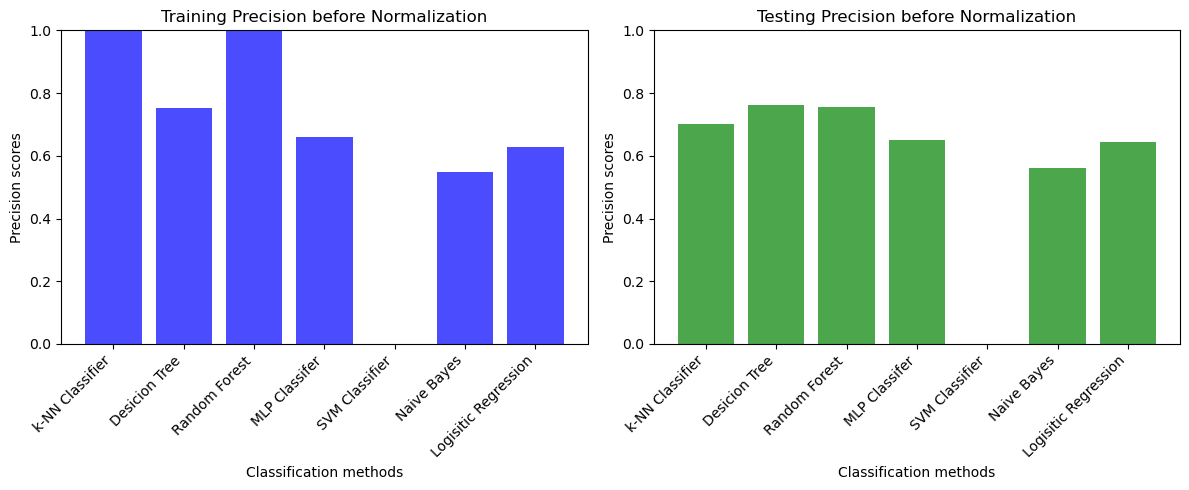

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, precision_bn_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Precision before Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Precision scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, precision_bn_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Precision before Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Precision scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\4194646525.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


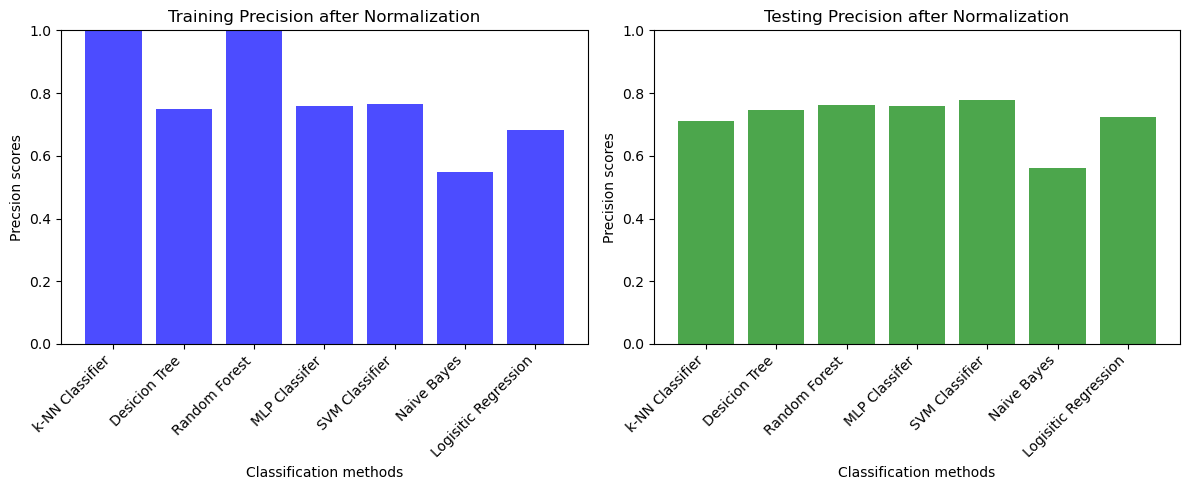

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, precision_an_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Precision after Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Precsion scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, precision_an_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Precision after Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Precision scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\1304574101.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


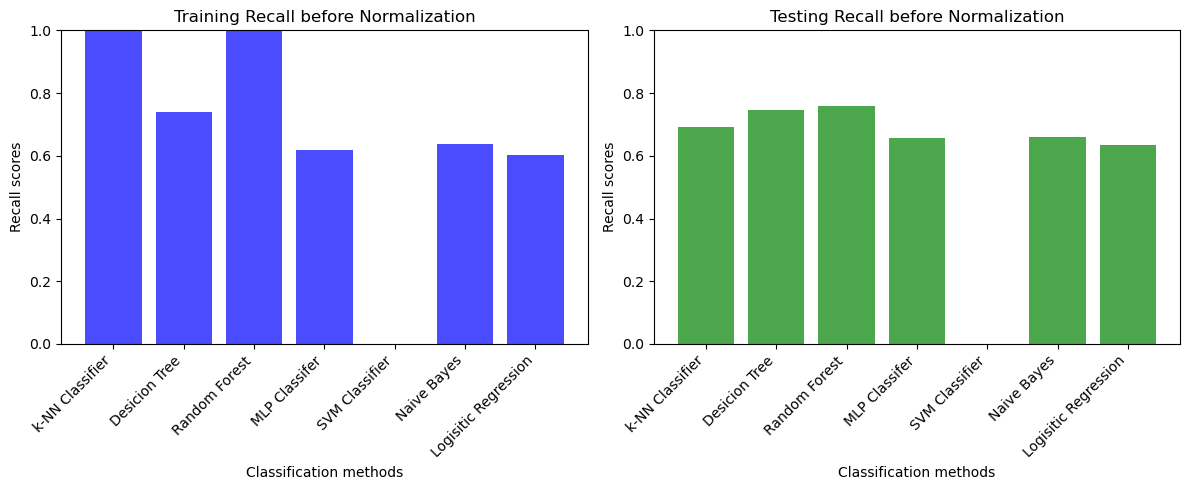

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, recall_bn_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Recall before Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Recall scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, recall_bn_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Recall before Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Recall scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\3991427340.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


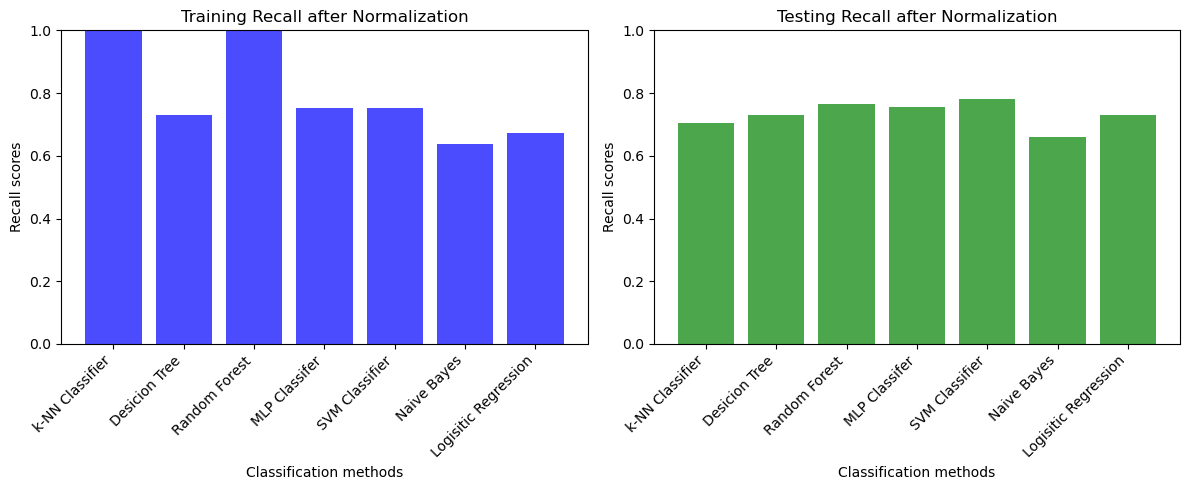

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, recall_an_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Recall after Normalization')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Recall scores')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, recall_an_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Recall after Normalization')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('Recall scores')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\1651621015.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


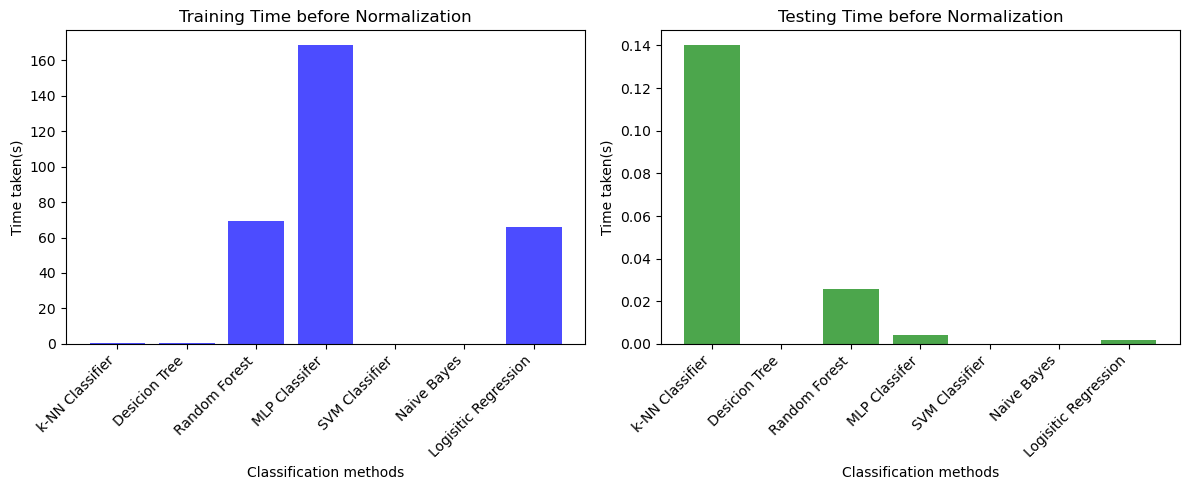

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, time_bn_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Time before Normalization')
axes[0].set_ylabel('Time taken(s)')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, time_bn_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Time before Normalization')
axes[1].set_ylabel('Time taken(s)')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8188\2449240666.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classifier_lists, rotation=45, ha='right')


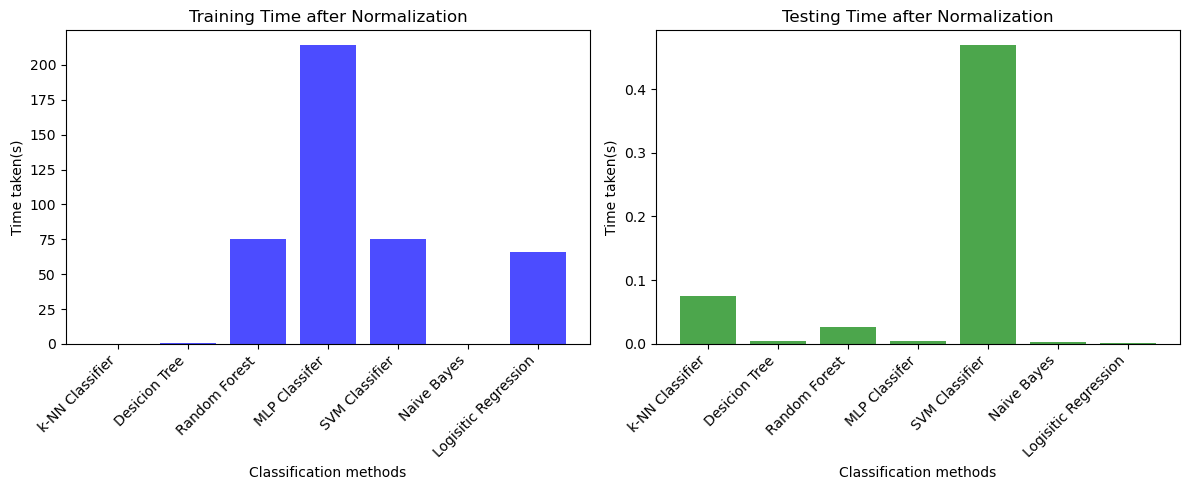

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(classifier_lists, time_an_training_lists, color='blue', alpha=0.7)
axes[0].set_title('Training Time after Normalization')
axes[0].set_ylabel('Time taken(s)')
axes[0].set_xlabel('Classification methods')

axes[1].bar(classifier_lists, time_an_testing_lists, color='green', alpha=0.7)
axes[1].set_title('Testing Time after Normalization')
axes[1].set_ylabel('Time taken(s)')
axes[1].set_xlabel('Classification methods')

for ax in axes:
    ax.set_xticklabels(classifier_lists, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [76]:
feature_accuracy_lists = [0.6872, 0.7262, 0.7161, 0.4083, 0.7556, 0.6488, 0.5955]
feature_precision_lists = [0.6884, 0.7226, 0.7139, 0.6690, 0.7546, 0.5705, 0.5879]
feature_recall_lists = [0.6782, 0.7262, 0.7161, 0.4083, 0.7556, 0.6488, 0.5955]
feature_f1_score_lists = [0.6823, 0.7081, 0.7141, 0.4299, 0.7422, 0.5778, 0.5914]
feature_time_lists = [5.5560, 0.3808, 0.0129, 119.2250, 1.3209, 0.0822, 6.0218]

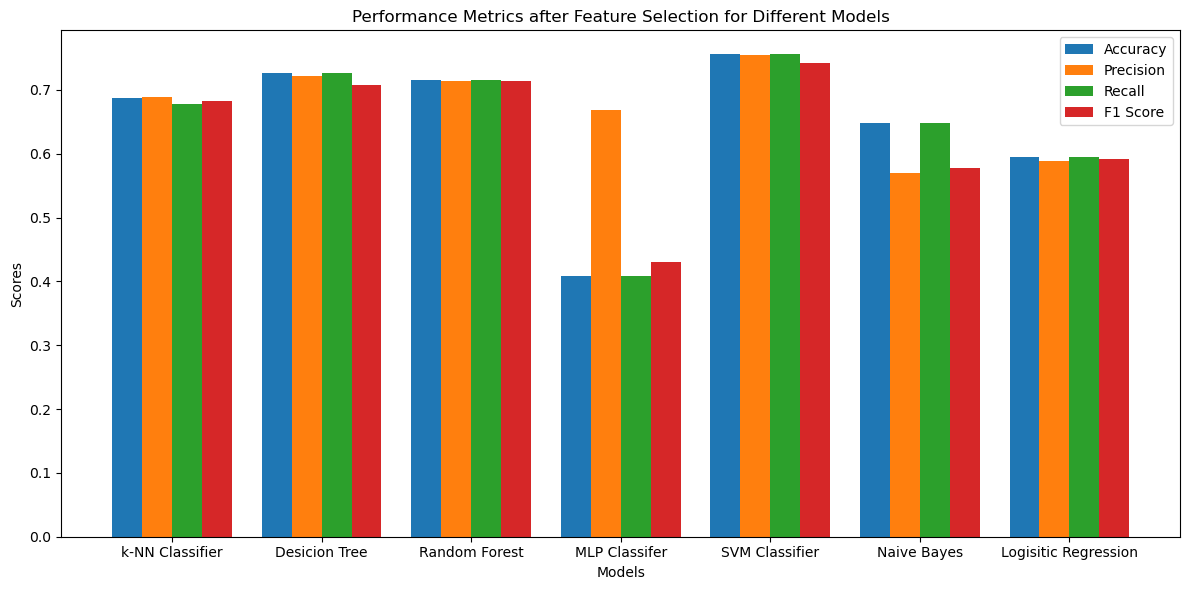

In [77]:
# Setting the positions for the bars
bar_width = 0.2
index = list(range(len(classifier_lists)))
index_precision = [i + bar_width for i in index]
index_recall = [i + 2 * bar_width for i in index]
index_f1 = [i + 3 * bar_width for i in index]

# Creating bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, feature_accuracy_lists, width=bar_width, label='Accuracy')
plt.bar(index_precision, feature_precision_lists, width=bar_width, label='Precision')
plt.bar(index_recall, feature_recall_lists, width=bar_width, label='Recall')
plt.bar(index_f1, feature_f1_score_lists, width=bar_width, label='F1 Score')

# Adding labels, titles, and legends
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics after Feature Selection for Different Models')
plt.xticks([i + 1.5 * bar_width for i in index], classifier_lists)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

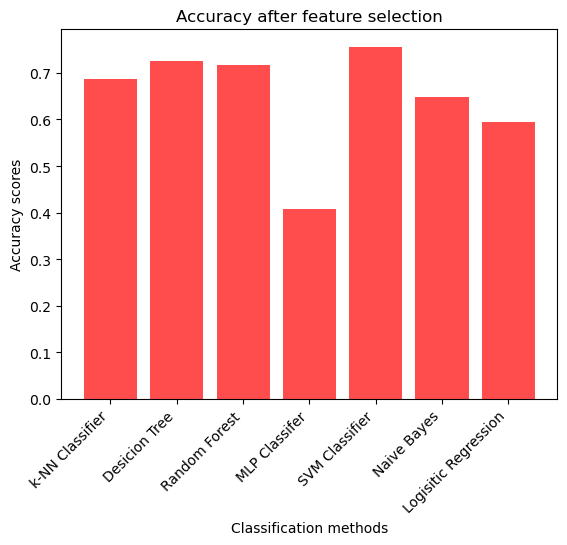

In [78]:
indices = np.arange(len(classifier_lists))

plt.bar(indices, feature_accuracy_lists, color='red', align='center', alpha=0.7)
plt.xlabel('Classification methods')
plt.ylabel('Accuracy scores')
plt.title('Accuracy after feature selection')

plt.xticks(indices, classifier_lists, rotation=45, ha='right')

plt.show()

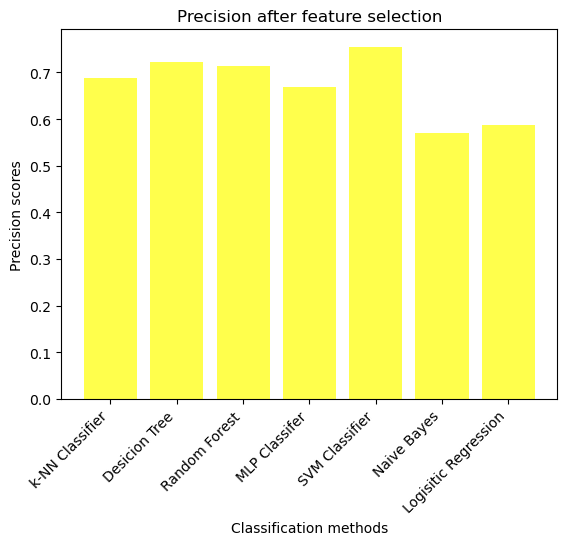

In [79]:
indices = np.arange(len(classifier_lists))

plt.bar(indices, feature_precision_lists, color='yellow', align='center', alpha=0.7)
plt.xlabel('Classification methods')
plt.ylabel('Precision scores')
plt.title('Precision after feature selection')

plt.xticks(indices, classifier_lists, rotation=45, ha='right')

plt.show()

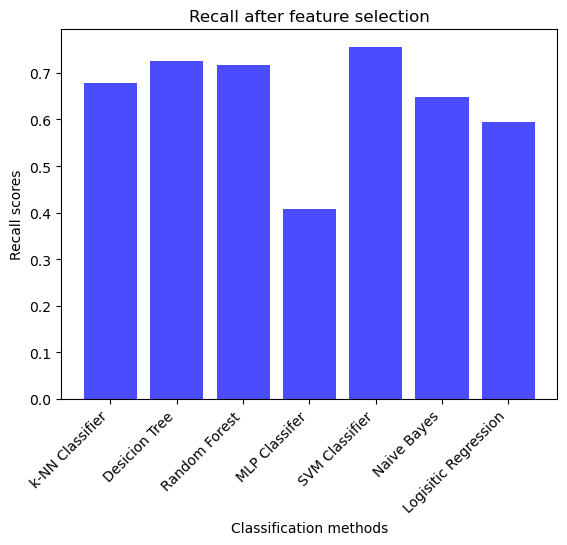

In [80]:
indices = np.arange(len(classifier_lists))

plt.bar(indices, feature_recall_lists, color='blue', align='center', alpha=0.7)
plt.xlabel('Classification methods')
plt.ylabel('Recall scores')
plt.title('Recall after feature selection')

plt.xticks(indices, classifier_lists, rotation=45, ha='right')

plt.show()

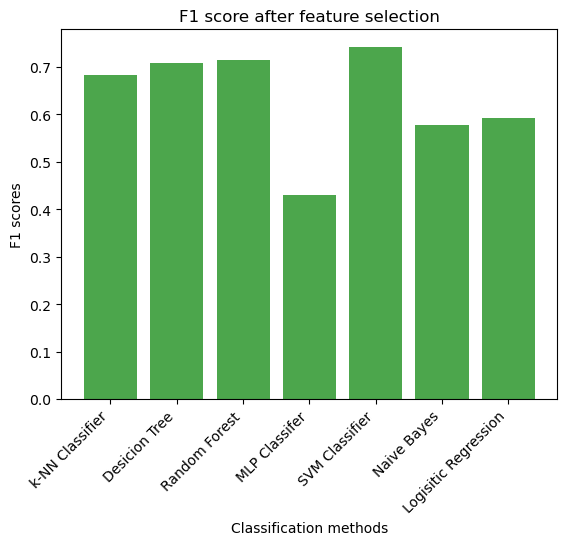

In [81]:
indices = np.arange(len(classifier_lists))

plt.bar(indices, feature_f1_score_lists, color='green', align='center', alpha=0.7)
plt.xlabel('Classification methods')
plt.ylabel('F1 scores')
plt.title('F1 score after feature selection')

plt.xticks(indices, classifier_lists, rotation=45, ha='right')

plt.show()

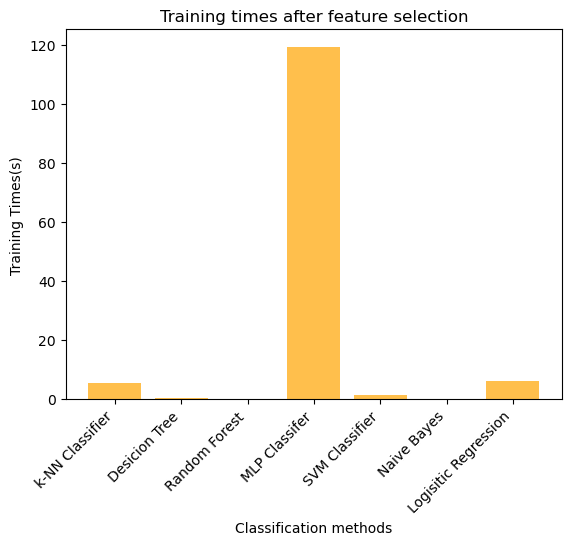

In [82]:
indices = np.arange(len(classifier_lists))

plt.bar(indices, feature_time_lists, color='orange', align='center', alpha=0.7)
plt.xlabel('Classification methods')
plt.ylabel('Training Times(s)')
plt.title('Training times after feature selection')

plt.xticks(indices, classifier_lists, rotation=45, ha='right')

plt.show()